In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined.head()

# Display the data table for preview
combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
# Unique mice by Mouse ID 

unique = combined["Mouse ID"].unique()
len(unique)

249

In [3]:
#Total rows, with duplicated Mouse ID's 
count = combined["Sex"].value_counts()
count

Male      958
Female    935
Name: Sex, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#First I tried with this function to see my duplicated rows, but didnt obtain all the rows for the Mouse ID "g989". 
#duplicateRows = combined[combined.duplicated(keep = False)]
#print(duplicateRows)

#So I found subset to consider the Mouse ID and the Timepoint column. 
duplicateID = combined[combined.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicateID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined.loc[combined["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_cleandata = clean_data["Mouse ID"].unique()
len(unique_cleandata)

248

In [7]:
clean_data["Mouse ID"].count()

1880

## Summary Statistics


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_drug = clean_data.groupby(['Drug Regimen'])


#To see my groupby table 
#grouped_drug.first()

mean = grouped_drug['Tumor Volume (mm3)'].mean()
median = grouped_drug['Tumor Volume (mm3)'].median()
var = grouped_drug['Tumor Volume (mm3)'].var()
std = grouped_drug['Tumor Volume (mm3)'].std()
sem = grouped_drug['Tumor Volume (mm3)'].sem()
drug_df = pd.DataFrame({ "mean": mean, 
       "median":median,
       "var": var,
       "std":std,
       "sem":sem
})

drug_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_two = clean_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem])     
drug_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [78]:
#See my values per Drug Regimen
drug_count = grouped_drug["Drug Regimen"].count()
drug_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

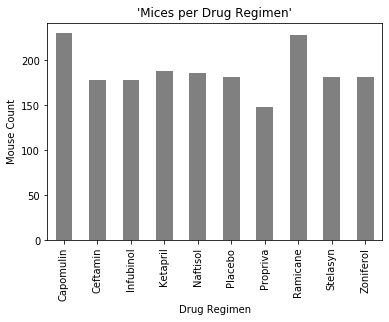

<Figure size 432x288 with 0 Axes>

In [87]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_pandas = drug_count.plot(kind='bar', color = "gray",title="'Mices per Drug Regimen'", width= .5)

#Adding format 
drug_pandas.set_xlabel("Drug Regimen")
drug_pandas.set_ylabel("Mouse Count")


#Let's see my chart
plt.show()
plt.tight_layout()


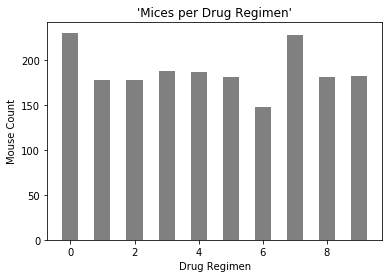

<Figure size 432x288 with 0 Axes>

In [85]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_count))

# Creating the bar chart 
plt.bar(x_axis, drug_count, color="gray", align="center", width=.5)

#Adding the thicks 



#Adding details to the chart 
plt.title("'Mices per Drug Regimen'")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

#Let's see the chart
plt.show()
plt.tight_layout()

(-1.1091177556002698,
 1.2128639238082213,
 -1.106700641755685,
 1.1034697461867102)

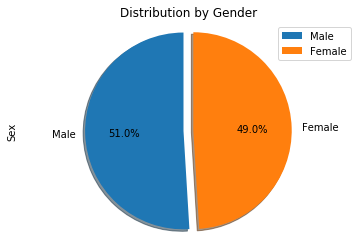

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_values = clean_data["Sex"].value_counts()
gender_pie = values.plot.pie(title="Distribution by Gender",startangle=90, explode=(0,0.1),autopct="%1.1f%%",shadow=True)
gender_pie.legend(loc="upper right", labels=gender_values.index.values)
plt.axis("equal")

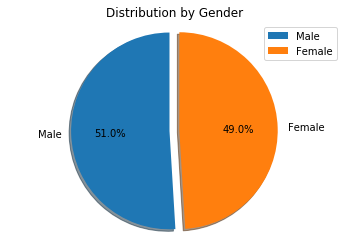

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values_gender = clean_data["Sex"].value_counts()
explode = (0,0.1)
plt.pie(values_gender, explode=explode, autopct="%1.1f%%", shadow=True, startangle=90, labels=values.index.values)
plt.legend(values_gender.index.values)
plt.title("Distribution by Gender")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots


In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
